![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Redes Neuronales

En este taller podrán poner en práctica sus conocimientos sobre la construcción e implementación de redes neuronales de una capa y multicapa. El taller está constituido por 4 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos predicción probabilidad de admisión a la universidad

En este taller se usará el conjunto de datos de admisiones a una universidad proveniente de la base de datos de Kaggle. Cada observación contiene la probabilidad de que un estudiante sea admitido por la universidad, dadas distintas variables predictoras como el puntaje del examén TOEFL y GRE, el promedio (GPA), entre otras. El objetivo es predecir la probabilidad de admissión de cada estudiante. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/mohansacharya/graduate-admissions).

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación librerías
import numpy as np
import keras as keras
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from keras.callbacks import EarlyStopping, ModelCheckpoint, ProgbarLogger, CSVLogger
from tensorflow.keras.callbacks import TensorBoard
from keras.callbacks import EarlyStopping, ModelCheckpoint

from sklearn.model_selection import train_test_split
from keras import initializers
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Dense, Activation
from livelossplot import PlotLossesKeras
from keras import backend as K
import keras.optimizers as opts

In [3]:
# Carga de datos de archivo .csv
data = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/universityGraduateAdmissions.csv', index_col=0)
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


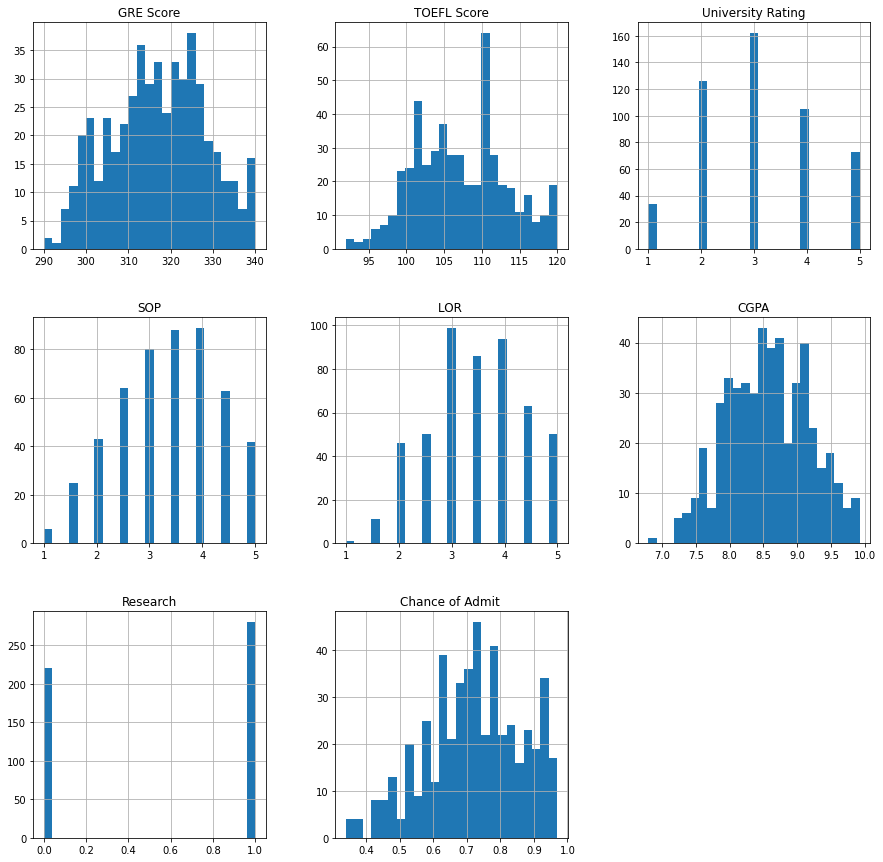

In [4]:
# Hitogramas de las varaibles del dataset
data.hist(bins=25, figsize=(15,15))
plt.show()

In [5]:
# Definición de variables predictoras (X)
X = data.drop(data.columns[-1], axis=1)
print(X.shape)
# Definición de variable de interés (y)
Y = data[data.columns[-1]]

(500, 7)


In [6]:
# Separación de variables predictoras (X) y variable de interés (y) en set de entrenamiento y test usandola función train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(X,Y,test_size=0.3, random_state=22)

## Punto 1 - Red Neuronal de una capa

En la celda 1 creen una **red neuronal de una capa** con la librería Keras, que prediga la probabilidad de admisión de los estudiantes, usando los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador y el número de épocas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

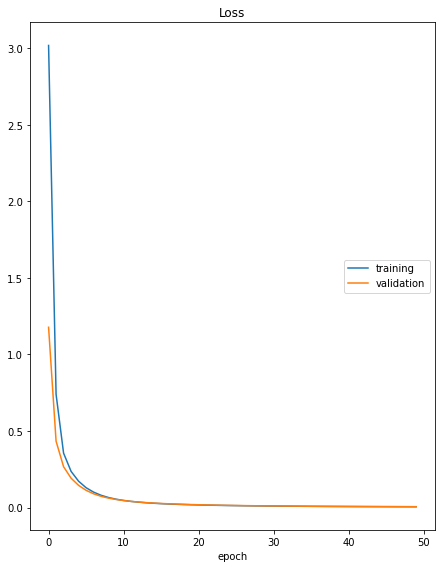

Loss
	training         	 (min:    0.005, max:    3.019, cur:    0.005)
	validation       	 (min:    0.005, max:    1.178, cur:    0.005)
11/11 [==============================] - 0s 23ms/step - loss: 0.0054 - val_loss: 0.0054


In [7]:
# Celda 1
# Normalización de variables predictoras (X) con la función StandardScaler
from sklearn.preprocessing import StandardScaler

# Definición de la función StandardScaler
scaler = StandardScaler()
scaler.fit(X)

# Transformación de los set de entrenamiento y test
X_train = pd.DataFrame(data=scaler.transform(xTrain), columns=xTrain.columns, index=xTrain.index)
X_test = pd.DataFrame(data=scaler.transform(xTest), columns=xTest.columns, index=xTest.index)


# Definición de dimensiones de salida, varaibles de interés
output_var = 1
print(output_var, ' output variables')

# Definición de dimensiones de entrada, varaibles predictoras
dims = X_train.shape[1]
print(dims, 'input variables')

dict_score_MSE = {}
dict_score_MAE = {}

K.clear_session()

# Definición red neuronal con la función Sequential()
model = Sequential()

# Definición de la capa densa con un tamaño de salida igual a output_var y un input_shape de dims
model.add(Dense(output_var, input_shape=(dims,)))

model.compile(optimizer='sgd', loss='MeanSquaredError')

# Entrenamiento de la red neuronal con 50 épocas
model.fit(X_train, yTrain, 
          verbose=1, 
          epochs=50, 
          validation_data=(X_test, yTest),
          callbacks=[CSVLogger('modelo_una_sola_capa_MSE.log'),PlotLossesKeras()])

dict_score_MSE['Una Capa MSE'] = model.get_metrics_result()['loss'].numpy()


In [8]:
dict_score_MSE

{'Una Capa MSE': 0.0053768917}

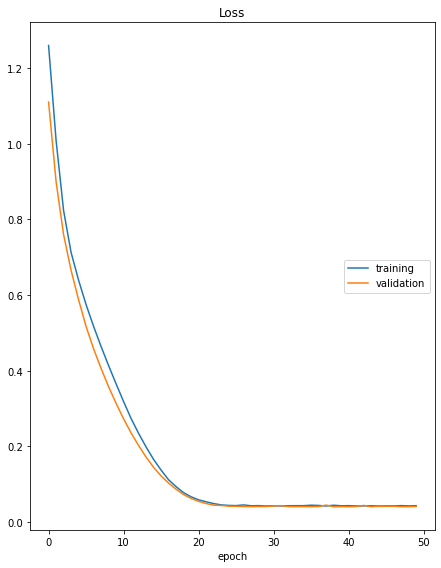

Loss
	training         	 (min:    0.043, max:    1.260, cur:    0.043)
	validation       	 (min:    0.041, max:    1.110, cur:    0.041)
11/11 [==============================] - 0s 17ms/step - loss: 0.0434 - val_loss: 0.0413


In [9]:
K.clear_session()


model = Sequential()
model.add(Dense(output_var, input_shape=(dims,)))
model.compile(optimizer='sgd', loss='MeanAbsoluteError')
model.fit(X_train, yTrain, 
          verbose=1, 
          epochs=50, 
          validation_data=(X_test, yTest),
          callbacks=[CSVLogger('modelo_una_sola_capa_MAE.log'),PlotLossesKeras()])

dict_score_MAE['Una Capa MAE'] = model.get_metrics_result()['loss'].numpy()


Para este punto se hicieron varias pruebas usando diferentes optimizadores, como 'adam' y 'RMSprop', pero se halló que el mejor es el optimizador 'sdg'. Este corresponde al optimizador por descenso del gradiente con momento. Al llamar este optimizador sin especificar más parámetros de la clase 'tf.keras.optimizers.SGD', la tasa de aprendizaje del optimizador es de 0.001, que es bastante bajo para los ajustes de los pesos en cada iteración.

* MAE = 0.0055
* MSE = 0.0410

Se puede ver que los dos modelos llegaron a un error final bastante bajo. Sin embargo, debido a las propiedades de las funciones de pérdida utilizadas, podemos sacar varias conclusiones. Por ejemplo, el hecho de que el MSE sea bajo, implica que el dataset tiene pocos valores extremadamente diferentes. Esta métrica es sensible a distancias grandes, pues crece con el cuadrado de la distancia entre observaciones y predicciones. Así, el valor tan bajo del modelo implica que las predicciones son considerablemente buenas. Por otro lado, el MAE no crece cuadráticamente con el error, de modo que es una buena medida para usar en datos que no tienen distancias considerables entre predicciones y observaciones. Sin embargo, a medida que los modelos se entrenan y la distancia entre $y$ y $\hat{y}$ se hace cercana a 0, el MAE no se puede calcular pues la derivada de la función del error en 0 está indefinida, de modo que no se puede aplicar el descenso del gradiente con tanta facilidad.

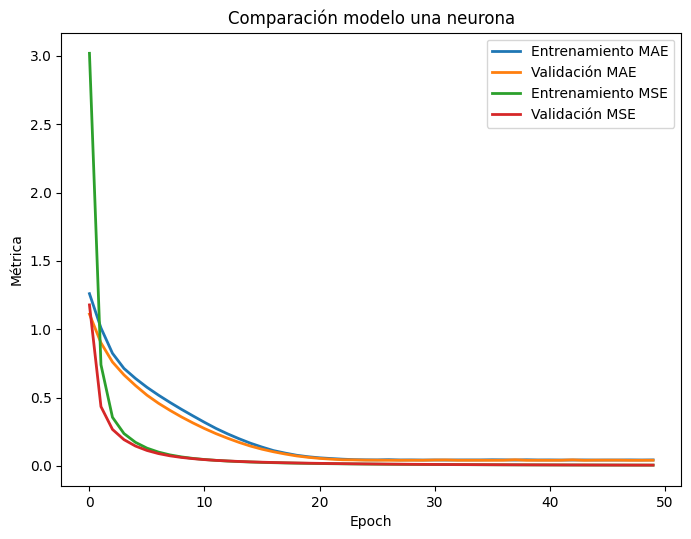

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=100)
linewidth = 2
df1 = pd.read_csv(r"modelo_una_sola_capa_MAE.log", sep=',')
df2 = pd.read_csv(r'modelo_una_sola_capa_MSE.log', sep=',')
plt.plot(df1['loss'], label='Entrenamiento MAE',linewidth=linewidth)
plt.plot(df1['val_loss'], label='Validación MAE',linewidth=linewidth)
plt.plot(df2['loss'], label='Entrenamiento MSE',linewidth=linewidth)
plt.plot(df2['val_loss'], label='Validación MSE',linewidth=linewidth)
plt.legend()
plt.title('Comparación modelo una neurona')
plt.xlabel('Epoch')
plt.ylabel('Métrica')
plt.show()

Con una sola neurona se observa que el modelo `MAE` inicia con un mejor ajuste, pero finalmente es superado por el `MSE`, dado que está aprendiendo mejor de sus errores en cada `epoch`. Pero al final de todas las epoch, `MAE` no pudo supear a `MSE`, se estabilizó en un nivel de error y ya no presentó mejoras.

## Punto 2 - Red Neuronal multicapa

En la celda 2 creen una **red neuronal con dos capas** con la librería Keras, que prediga la probabilidad de admisión de los estudiantes usando los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador, el número de épocas y el número de neuronas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

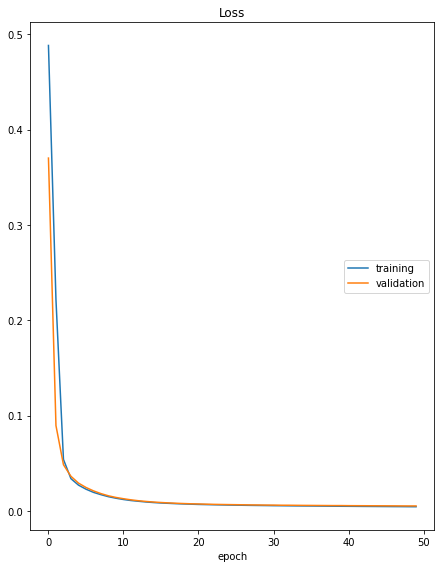

Loss
	training         	 (min:    0.004, max:    0.488, cur:    0.004)
	validation       	 (min:    0.005, max:    0.370, cur:    0.005)
11/11 [==============================] - 0s 18ms/step - loss: 0.0045 - val_loss: 0.0053
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 300)               2400      
                                                                 
 dense_1 (Dense)             (None, 300)               90300     
                                                                 
 dense_2 (Dense)             (None, 1)                 301       
                                                                 
 activation (Activation)     (None, 1)                 0         
                                                                 
Total params: 93,001
Trainable params: 93,001
Non-trainable params: 0
_________________________

In [11]:
# Celda 2
K.clear_session()

# Definición red neuronal con la función Sequential()
model = Sequential()

# Definición de la capa densa con un tamaño de salida igual a output_var y un input_shape de dims
model.add(Dense(300, input_shape=(dims,),activation='relu'))
model.add(Dense(300,activation='relu'))
model.add(Dense(output_var))
model.add(Activation('relu'))
model.compile(optimizer='sgd', loss='MeanSquaredError')

# Entrenamiento de la red neuronal con 50 épocas
model.fit(X_train, yTrain, 
          verbose=1, 
          epochs=50, 
          validation_data=(X_test, yTest),
          callbacks=[CSVLogger('Modelo_dos_capas_MSE.log'),PlotLossesKeras()])

# Impresión de la arquitectura de la red neuronal
print(model.summary())
dict_score_MSE['Dos Capas MSE'] = model.get_metrics_result()['loss'].numpy()


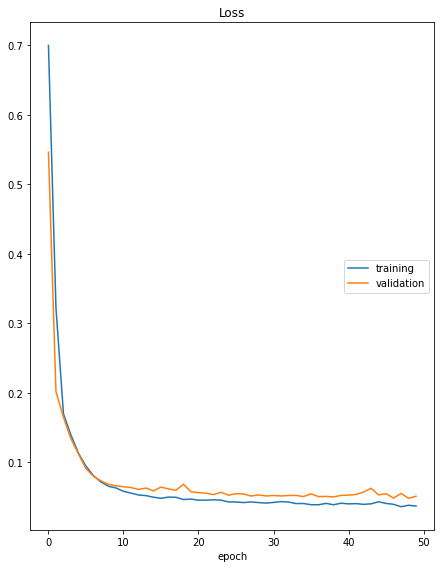

Loss
	training         	 (min:    0.036, max:    0.700, cur:    0.037)
	validation       	 (min:    0.048, max:    0.546, cur:    0.051)
11/11 [==============================] - 0s 17ms/step - loss: 0.0370 - val_loss: 0.0511
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 300)               2400      
                                                                 
 dense_1 (Dense)             (None, 300)               90300     
                                                                 
 dense_2 (Dense)             (None, 1)                 301       
                                                                 
 activation (Activation)     (None, 1)                 0         
                                                                 
Total params: 93,001
Trainable params: 93,001
Non-trainable params: 0
_________________________

In [12]:
# Celda 2
K.clear_session()

# Definición red neuronal con la función Sequential()
model = Sequential()

# Definición de la capa densa con un tamaño de salida igual a output_var y un input_shape de dims
model.add(Dense(300, input_shape=(dims,),activation='relu'))
model.add(Dense(300,activation='relu'))
model.add(Dense(output_var))
model.add(Activation('relu'))
model.compile(optimizer='sgd', loss='MeanAbsoluteError')

# Entrenamiento de la red neuronal con 50 épocas
model.fit(X_train, yTrain, 
          verbose=1, 
          epochs=50, 
          validation_data=(X_test, yTest),
          callbacks=[CSVLogger('Modelo_dos_capas_MAE.log'),PlotLossesKeras()])

# Impresión de la arquitectura de la red neuronal
print(model.summary())
dict_score_MAE['Dos Capas MAE'] = model.get_metrics_result()['loss'].numpy()


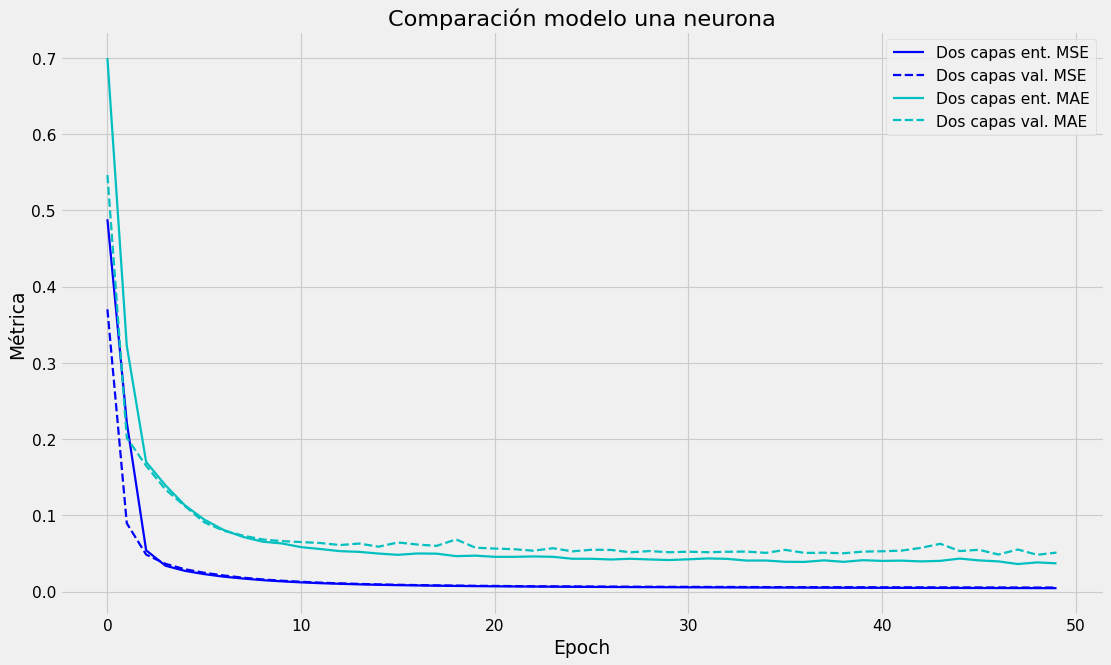

In [22]:
figure(figsize=(15, 9), dpi=80)
linewidth = 2
df3 = pd.read_csv(r'Modelo_dos_capas_MSE.log', sep=',')
df3_ = pd.read_csv(r'Modelo_dos_capas_MAE.log', sep=',')

plt.plot(df3['loss'], "b",label='Dos capas ent. MSE',linewidth=linewidth)
plt.plot(df3['val_loss'], "b--",label='Dos capas val. MSE',linewidth=linewidth)

plt.plot(df3_['loss'], "c",label='Dos capas ent. MAE',linewidth=linewidth)
plt.plot(df3_['val_loss'], "c--",label='Dos capas val. MAE',linewidth=linewidth)

plt.legend()
plt.title('Comparación modelo una neurona')
plt.xlabel('Epoch')
plt.ylabel('Métrica')
plt.show()

En este modelo de dos capas se puede apreciar que el error ya no presenta variaciones altas, todas empiezan con un error inferior a 1, mientras que en el modelo de una sola capa se observaban errores en `MSE` superiores a 1. Es clara la mejora, no solo por la menor tasa, sino, por la brecha  entre las métricas que amplía entre `MAE` y `MSE`; en el modelo con una sola neurona, no se observaba tan marcada esta diferencia. Además, este modelo se ajusta más rápidamente al error. Se puede decir que la red aprende más rápidamente, uqe se evidencia en que el ángulo que describen las curvas es más cercano a un ángulo recto y el error es inferior a 0.1 en menos de 5 épocas.

## Punto 3  - Red Neuronal multicapa

En la celda 3 creen **una red neuronal con más de una capa con la librería Keras, usando early stopping y dropout,** que prediga la probabilidad de admisión de los estudiantes con los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador, el número de épocas y el número de neuronas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

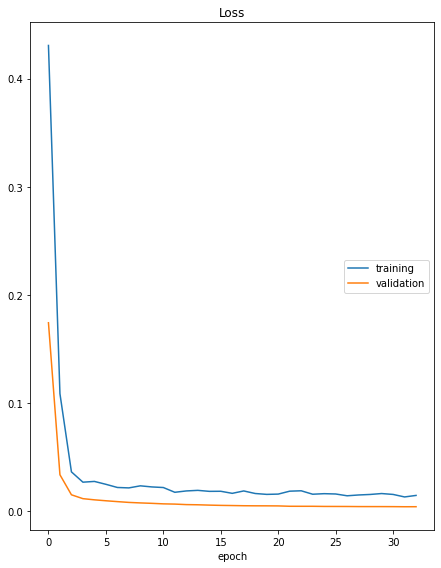

Loss
	training         	 (min:    0.013, max:    0.431, cur:    0.014)
	validation       	 (min:    0.004, max:    0.174, cur:    0.004)
11/11 [==============================] - 0s 19ms/step - loss: 0.0145 - val_loss: 0.0040
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               2048      
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 128)               16512     
                             

In [13]:
# Celda 3
K.clear_session()

# Definición red neuronal con la función Sequential()
model = Sequential()

# Definición de la capa densa con un tamaño de salida igual a output_var y un input_shape de dims
model.add(Dense(256, input_shape=(dims,),activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='gelu'))
model.add(Dense(16,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(output_var))
model.add(Activation('relu'))
model.compile(optimizer='sgd', loss='MeanSquaredError')

# Entrenamiento de la red neuronal con 50 épocas
model.fit(X_train, yTrain, 
          verbose=1, 
          epochs=50, 
          validation_data=(X_test, yTest),
          callbacks=[CSVLogger('modelo_Multicapa_MSE.log'),PlotLossesKeras(),EarlyStopping()]) #monitor='val_loss', patience=2, verbose=True,min_delta=0.00001

# Impresión de la arquitectura de la red neuronal
print(model.summary())
dict_score_MSE['Multicapa MSE'] = model.get_metrics_result()['loss'].numpy()


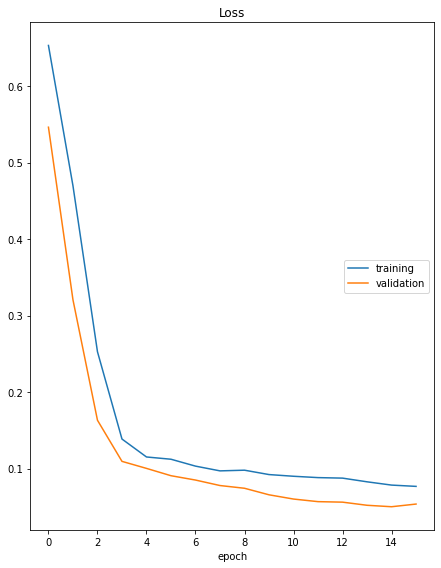

Loss
	training         	 (min:    0.077, max:    0.653, cur:    0.077)
	validation       	 (min:    0.050, max:    0.546, cur:    0.054)
11/11 [==============================] - 0s 23ms/step - loss: 0.0768 - val_loss: 0.0537
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               2048      
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 128)               16512     
                             

In [14]:
K.clear_session()


# Definición red neuronal con la función Sequential()
model = Sequential()

# Definición de la capa densa con un tamaño de salida igual a output_var y un input_shape de dims
model.add(Dense(256, input_shape=(dims,),activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='gelu'))
model.add(Dense(16,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(output_var))
model.add(Activation('relu'))
model.compile(optimizer='sgd', loss='MeanAbsoluteError')

# Entrenamiento de la red neuronal con 50 épocas
model.fit(X_train, yTrain, 
          verbose=1, 
          epochs=50, 
          validation_data=(X_test, yTest),
          callbacks=[CSVLogger('modelo_multicapa_MAE.log'),PlotLossesKeras(),EarlyStopping()]) #monitor='val_loss', patience=2, verbose=True,min_delta=0.00001

# Impresión de la arquitectura de la red neuronal
print(model.summary())
dict_score_MAE['Multicapa MAE'] = model.get_metrics_result()['loss'].numpy()


En conclusión, para este punto se utiliza `early stopping` para conocer metodologías que ayuden a acelerar el proceso de entrenamiento de las redes y obtener un resultado similar al haber entrenado durate todas las épocas planteadas. Esto es útil cuando el set de datos es grande y las redes poseen varias capas con un gran número de neuronas, por ejemplo en el procesamiento de imágenes. En ambos modelos, se evidencia que el criterio de parada es activado antes de completar las 50 épocas, obteniendo buenos resultados al compararlos con el resto (ver punto 4). También se ve el comportamiento de las capas `dropout` las cuales ayudan a mitigar el fenómeno de overfitting, al deshabilitar los efectos de ciertas neuronas en algunas de las capas, nostros escogimos colocar dropout despues de la capa de inputs y antes de la capa de salida,  con el fin de forzar a los pesos de las capas internas a aprender distintas relaciones de variables de entrada y, así mismo, adaptarse para encontrar los mejores pesos en las variables de salida. Esto resulta en un mejor desempeño del modelo (ver punto 4)
El callback Earlystopping está monitoreando por defecto `val_loss` y está detectando mejoras que están por encima de `min_delta` que por defecto es cero, es decir, que en la medida que hay una ganancia por epoch, el modelo va a seguir en todas las epoch especificadas. Es clara la ventaja que da el dropout, al evitar que las neuronas se especialicen en un ejemplo específico y  a pesar de que se necesitan mas épocas para converger, se están utlizando menos neuronas. En conjunto, al tratar de evitar el sobreajuste con el dropout y mejorar la eficiencia computacional del modelo con earlystopping, se logra disminuir aún más el error y que el modelo tenga una mejor generalidad sobre los datos. El mejor modelo sigue siendo aquel que analiza el `MSE` que castiga los errores y el  `MAE` no logra mejoras significativas.

## Punto 4 - Comparación y análisis de resultados

En la celda 4 comparen los resultados obtenidos de las diferentes redes y comenten las ventajas del mejor modelo y las desventajas del modelo con el menor desempeño.

,Una Capa MSE,Dos Capas MSE,Multicapa MSE
0,0.005377,0.005303,0.00403


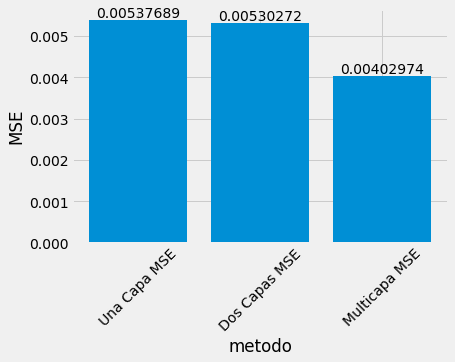

In [15]:
bar_data = pd.DataFrame(dict_score_MSE, index=[0])

display(bar_data)

plt.style.use('fivethirtyeight')
plt.bar_label(plt.bar(x=bar_data.columns, height=bar_data.values[0]))
plt.xlabel('metodo')
plt.ylabel('MSE')
plt.xticks(rotation=45);

Como se puede observar, al utilizar el MSE como función de pérdida se observa que el modelo de varias capas presenta un valor más bajo de MSE, lo que sugiere que este modelo puede tener una mejor capacidad para ajustarse a los datos de entrenamiento y generalizar a nuevos datos. En este sentido, el modelo multicapa puede ser una mejor opción para realizar predicciones en comparación con un modelo de una o dos capas.

Esto podría llevar a la conclusión erronea de que en todos los casos es mejor usar un modelo multicapa. Sin embargo, cabe destacar que la elección del número de capas dependerá del problema específico que se esté resolviendo y de la complejidad de los datos. Por lo que se podría presentar casos en los que modelos más simples, de una capa por ejemplo, podrían ser suficiente para lograr una buena precisión en la predicción.

,Una Capa MAE,Dos Capas MAE,Multicapa MAE
0,0.041259,0.051116,0.053669


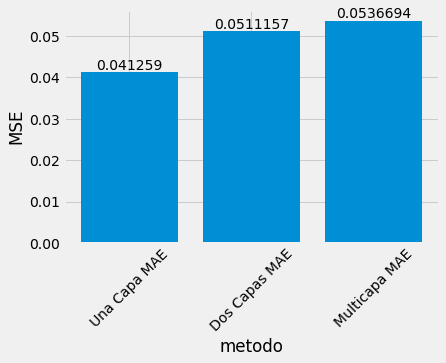

In [16]:
bar_data = pd.DataFrame(dict_score_MAE, index=[0])

display(bar_data)

plt.style.use('fivethirtyeight')
plt.bar_label(plt.bar(x=bar_data.columns, height=bar_data.values[0]))
plt.xlabel('metodo')
plt.ylabel('MSE')
plt.xticks(rotation=45);

Como se observa al realizar la comparación de los MAE se puede llegar a una conclusión diferente, esto se puede deber a que el MAE:
1. No penaliza los errores grandes: El MAE mide la diferencia absoluta entre las predicciones del modelo y los valores reales de los datos, lo que significa que los errores grandes y pequeños reciben el mismo peso. En algunos casos, es posible que se desee penalizar más los errores grandes, lo que puede ser logrado con el uso del error cuadrático medio (MSE) o de otras funciones de pérdida.
2. Es menos sensible a los valores atípicos: El MAE es menos sensible a los valores atípicos que el MSE. Esto puede ser beneficioso en algunos casos donde se espera que los datos tengan valores extremos o donde los errores grandes son menos importantes que los errores pequeños.
3. No es diferenciable en algunos puntos: El MAE no es diferenciable en cero, lo que puede dificultar la optimización de la función de pérdida y la actualización de los pesos de la red neuronal durante el proceso de entrenamiento. En comparación, el MSE es diferenciable en todos los puntos, lo que lo hace más adecuado para la optimización mediante algoritmos como el descenso de gradiente.

Basado en los tres puntos anteriores se puede concluir, como se hizo anteriormente, que es mejor realizar el comparativo de los diferentes modelos a través del MSE

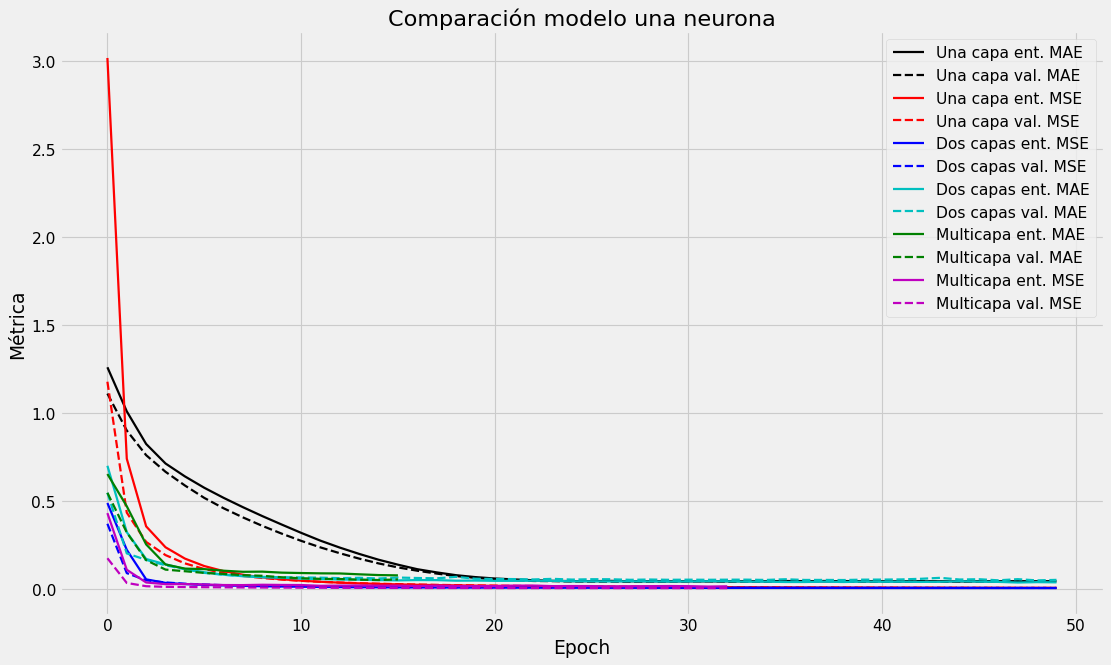

In [21]:

figure(figsize=(15, 9), dpi=80)
linewidth = 2
df1 = pd.read_csv(r"modelo_una_sola_capa_MAE.log", sep=',')
df2 = pd.read_csv(r'modelo_una_sola_capa_MSE.log', sep=',')
df3 = pd.read_csv(r'Modelo_dos_capas_MSE.log', sep=',')
df3_ = pd.read_csv(r'Modelo_dos_capas_MAE.log', sep=',')
df4 = pd.read_csv(r'modelo_multicapa_MAE.log', sep=',')
df5 = pd.read_csv(r'modelo_multicapa_MSE.log', sep=',')


plt.plot(df1['loss'], "k", label='Una capa ent. MAE',linewidth=linewidth)
plt.plot(df1['val_loss'],"k--", label='Una capa val. MAE',linewidth=linewidth)

plt.plot(df2['loss'], "r",label='Una capa ent. MSE',linewidth=linewidth)
plt.plot(df2['val_loss'], "r--",label='Una capa val. MSE',linewidth=linewidth)

plt.plot(df3['loss'], "b",label='Dos capas ent. MSE',linewidth=linewidth)
plt.plot(df3['val_loss'], "b--",label='Dos capas val. MSE',linewidth=linewidth)

plt.plot(df3_['loss'], "c",label='Dos capas ent. MAE',linewidth=linewidth)
plt.plot(df3_['val_loss'], "c--",label='Dos capas val. MAE',linewidth=linewidth)


plt.plot(df4['loss'], "g",label='Multicapa ent. MAE',linewidth=linewidth)
plt.plot(df4['val_loss'], "g--",label='Multicapa val. MAE',linewidth=linewidth)

plt.plot(df5['loss'], "m", label='Multicapa ent. MSE',linewidth=linewidth)
plt.plot(df5['val_loss'], "m--", label='Multicapa val. MSE',linewidth=linewidth)

plt.legend()
plt.title('Comparación modelo una neurona')
plt.xlabel('Epoch')
plt.ylabel('Métrica')
plt.show()

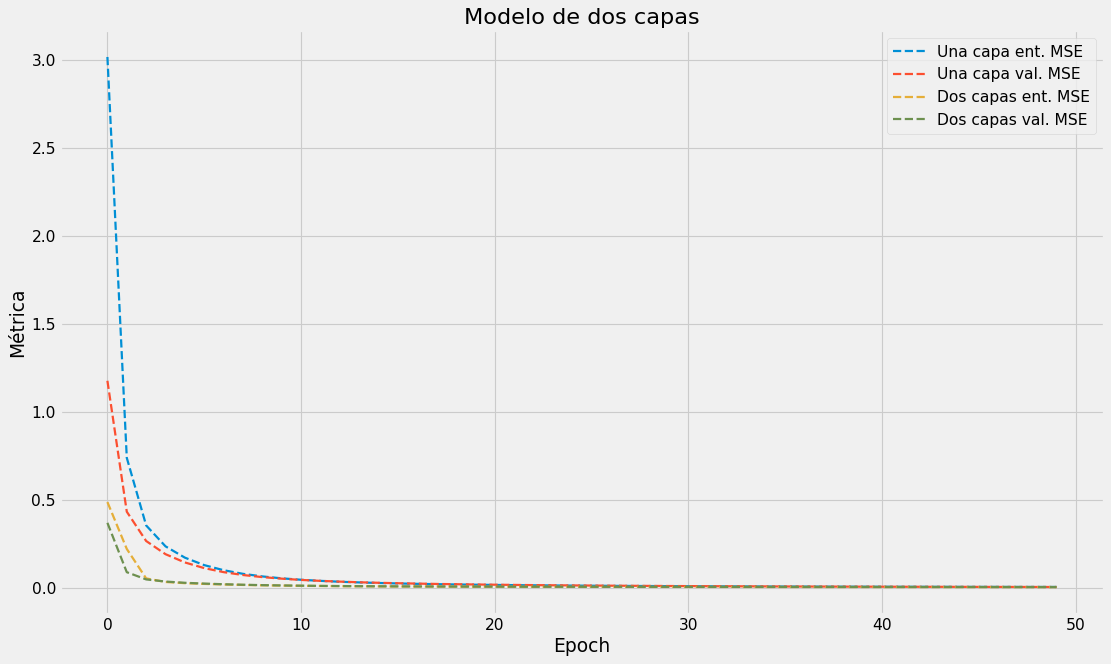

In [18]:
figure(figsize=(15, 9), dpi=80)
linewidth = 2


plt.plot(df2['loss'], label='Una capa ent. MSE',linewidth=linewidth,linestyle='dashed')
plt.plot(df2['val_loss'], label='Una capa val. MSE',linewidth=linewidth,linestyle='dashed')

plt.plot(df3['loss'], label='Dos capas ent. MSE',linewidth=linewidth,linestyle='dashed')
plt.plot(df3['val_loss'], label='Dos capas val. MSE',linewidth=linewidth,linestyle='dashed');

plt.legend()
plt.title('Modelo de dos capas')
plt.xlabel('Epoch')
plt.ylabel('Métrica')
plt.show()

### Conclusiones

De todos los entrenamientos, pruebas, ajustes de hiperparámetros, opciones de configuraciòn (callbacks) de los modelos que se corrieron anteriormente, se concluye que:
- La selección de la medida para evaluar el funcionamiento del modelo es crucial. Al parecer, el modelo aprende mejor si se penalizan las diferencias frente al pronóstico con el MSE. Lo anterior debido a que MSE penaliza más las diferencias frente al pronóstico y es más fuerte el efecto de un error. Esto también puede explicar por qué, a pesar que de el MAE ajusta mejor al principio, el MSE requiere de menos epochs para que la tasa de error se estabilice.
- Después de un número suficiente de epochs, se alcanza una tasa de error similar en ambos modelos para cada punto. Esto es testamento de la gran capacidad de aplicación de las redes en modelos de Machine Learning.
- El modelo de una neurona alcanza al modelo multicapa después de un número de epoch. Es decir, un modelo multicapa se ajusta  más rápido que el de una sola neurona, pero al final el modelo de una sola neurona puede que lo supere. Esto puede implicar que, si el caso de aplicación tiene un número grande de predictores, puede ser ventajoso usar varias capas, pues el desempeño es bueno más rápidamente, pero si el caso tiene pocos predictores puede ser mejor usar una capa, pues el modelo llega a un nivel de capacidad de predicción bueno, sin hacerse computacionalmente costoso.
- La utlización de los callback dropout y earlystopping, se hacen necesararios ya que, por sí sola, la red neuronal puede tender a un sobre ajuste o a que las neuronas se enfoquen en ejemplos específicos. El uso de estas técnicas fue la mejor manera de lograr el modelo mas generalizable a los datos, que además es más eficiente en la reduccion del error. Por esto, se ve que el mejor modelo es el que usa los callback junto con la evaluación del error en la muestra de validación mediante el MSE (al parecer castigando más los errores se logra un mejor aprendizaje y una convergencia más rápida).
- A medida que se van complejizando las redes, se ve que el desempeño mejora, no en términos de error final, sino en la velocidad con la que los modelos aprenden y se obtienen errores pequeños, con pocas iteraciones de entrenamiento. A pesar de que notamos que los valores de error final son diferentes cada vez que corremos este notebook, vemos que este comportamiento es consistente. Esto quiere decir que las redes pueden ser modelos confiables con relativamente poco entrenamiento si se usan técnicas de prevención del sobreajuste como early stopping, dropout y el uso de varias capas con un optimizador y función de pérdida adecuados.